In [34]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")
import sqlite3 as sql
import pandas as pd
import os

In [ ]:

# Connect to SQLite database
conn = sql.connect("C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/nba.sqlite")

df_games = pd.read_sql('select * from game', conn) # use connection object and a arbitrary SQL argument with Pandas
df_games.head() # display first five rows of resultant DataFrame

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,0024600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,0024600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,0024600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,0024600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,0024600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


In [ ]:
from sqlalchemy import create_engine
import pandas as pd

# Connect to the SQLite database
db_path = "C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/nba.sqlite"
engine = create_engine(f"sqlite:///{db_path}")

# Query the last 5 games based on an 'id' or 'date' column
pd.set_option('display.max_columns', None)
query_games = "SELECT * FROM game ORDER BY game_date DESC LIMIT 1;"  # Replace 'id' with the appropriate column
df_games = pd.read_sql_query(query_games, engine)

# Display the result
print(df_games)

0    28.0
Name: fg3a_home, dtype: float64


In [6]:
df_play_by_play = pd.read_sql('select * from play_by_play', conn) # use connection object and a arbitrary SQL argument with Pandas
df_play_by_play.head() # display first five rows of resultant DataFrame

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,score,scoremargin,person1type,player1_id,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,person2type,player2_id,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag
0,0029600012,0,12,0,1,14:43 PM,12:00,None,Start of 1st Period (14:43 PM EST),None,None,None,0.0,0,None,None,None,None,None,0.0,0,None,None,None,None,None,0.0,0,None,None,None,None,None,0
1,0029600012,2,10,0,1,14:50 PM,12:00,Jump Ball O'Neal vs. Kleine: Tip to Cassell,None,None,None,None,4.0,406,Shaquille O'Neal,1610612747.0,Los Angeles,Lakers,LAL,5.0,170,Joe Kleine,1610612756.0,Phoenix,Suns,PHX,5.0,208,Sam Cassell,1610612756.0,Phoenix,Suns,PHX,0
2,0029600012,3,2,1,1,14:51 PM,11:45,None,None,MISS Cassell 15' Jump Shot,None,None,5.0,208,Sam Cassell,1610612756.0,Phoenix,Suns,PHX,0.0,0,None,None,None,None,None,0.0,0,None,None,None,None,None,0
3,0029600012,4,4,0,1,14:51 PM,11:43,O'Neal REBOUND (Off:0 Def:1),None,None,None,None,4.0,406,Shaquille O'Neal,1610612747.0,Los Angeles,Lakers,LAL,0.0,0,None,None,None,None,None,0.0,0,None,None,None,None,None,0
4,0029600012,5,2,1,1,14:51 PM,11:29,MISS Ceballos 26' 3PT Jump Shot,None,None,None,None,4.0,76,Cedric Ceballos,1610612747.0,Los Angeles,Lakers,LAL,0.0,0,None,None,None,None,None,0.0,0,None,None,None,None,None,0


In [ ]:
#PLAY BY PLAY
gears = "SELECT * FROM play_by_play WHERE game_id = '0029600012' LIMIT 800;"
pd.set_option('display.max_columns', None)
df_play_by_play = pd.read_sql_query(gears, engine)
print(df_play_by_play)

        game_id  eventnum  eventmsgtype  eventmsgactiontype  period  \
0    0029600012         0            12                   0       1   
1    0029600012         2            10                   0       1   
2    0029600012         3             2                   1       1   
3    0029600012         4             4                   0       1   
4    0029600012         5             2                   1       1   
..          ...       ...           ...                 ...     ...   
461  0029600012       485             3                  11       4   
462  0029600012       486             4                   0       4   
463  0029600012       487             3                  12       4   
464  0029600012       488             4                   0       4   
465  0029600012       489            13                   0       4   

    wctimestring pctimestring                              homedescription  \
0       14:43 PM        12:00                                        

In [106]:
query_other_stats = "SELECT * FROM other_stats LIMIT 10;"
df_other_stats = pd.read_sql_query(query_other_stats, engine)
print(df_other_stats)

      game_id league_id team_id_home team_abbreviation_home team_city_home  \
0  0029600012        00   1610612756                    PHX        Phoenix   
1  0029600005        00   1610612737                    ATL        Atlanta   
2  0029600002        00   1610612739                    CLE      Cleveland   
3  0029600007        00   1610612754                    IND        Indiana   
4  0029600013        00   1610612746                    LAC    Los Angeles   
5  0029600009        00   1610612745                    HOU        Houston   
6  0029600014        00   1610612757                    POR       Portland   
7  0029600001        00   1610612738                    BOS         Boston   
8  0029600006        00   1610612761                    TOR        Toronto   
9  0029600003        00   1610612749                    MIL      Milwaukee   

   pts_paint_home  pts_2nd_chance_home  pts_fb_home  largest_lead_home  \
0              44                   18            2                

In [35]:
#Creating trend for 3-point attempts for al

folder_path = "C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main"



In [57]:
#Total 3 point attempts and makes for each season
total_attempts = []
total_makes = []
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file)
        print(f"Processing file: {file_path}")
        # Load the CSV into a DataFrame
        df_3ptattempt = pd.read_csv(file_path)
    attempts = 0
    makes = 0
    for index, row in df_3ptattempt.iterrows():
        if row['ZONE_RANGE'] == '24+ ft.':
            attempts += 1
            if row['SHOT_MADE'] == True:
                makes += 1

    total_attempts.append(attempts)
    total_makes.append(makes)

print(total_makes)
print(total_attempts)


Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2004_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2005_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2006_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2007_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2008_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2009_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2010_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2011_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NB

In [58]:
years = range(2004,2025)
year_dict_three = {}
for i, year in enumerate(years):
    year_dict_three[year] = [total_makes[i], total_attempts[i]]

print(year_dict_three)

{2004: [12299, 35008], 2005: [13740, 38193], 2006: [14056, 38783], 2007: [14892, 41107], 2008: [16087, 43874], 2009: [16306, 43917], 2010: [15795, 44043], 2011: [15862, 43744], 2012: [12672, 36016], 2013: [17590, 48563], 2014: [19021, 52431], 2015: [19281, 54641], 2016: [20887, 58594], 2017: [23663, 65680], 2018: [25767, 70675], 2019: [27891, 78125], 2020: [25822, 71721], 2021: [27394, 74421], 2022: [30521, 85880], 2023: [30287, 83574], 2024: [31569, 85889]}


In [59]:
#Total layup attempts and makes for each season
total_attempts = []
total_makes = []
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file)
        print(f"Processing file: {file_path}")
        # Load the CSV into a DataFrame
        df_layupptattempt = pd.read_csv(file_path)
    attempts = 0
    makes = 0
    for index, row in df_layupptattempt.iterrows():
        if row['ZONE_RANGE'] == 'Less Than 8 ft.':
            attempts += 1
            if row['SHOT_MADE'] == True:
                makes += 1

    total_attempts.append(attempts)
    total_makes.append(makes)

print(total_makes)
print(total_attempts)

Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2004_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2005_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2006_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2007_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2008_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2009_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2010_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NBA_2011_Shots.csv
Processing file: C:/Users/kinga/Documents/LOCKED/NBA-Analysis/nba.sqlite/NBA_Shots_04_24-main\NB

In [60]:
years = range(2004,2025)
year_dict_layup = {}
for i, year in enumerate(years):
    year_dict_layup[year] = [total_makes[i], total_attempts[i]]

print(year_dict_layup)


{2004: [41270, 76917], 2005: [43610, 79866], 2006: [44007, 79616], 2007: [45407, 80716], 2008: [44666, 79134], 2009: [45073, 80050], 2010: [47314, 82651], 2011: [46837, 83269], 2012: [37367, 67741], 2013: [47153, 85193], 2014: [47969, 86165], 2015: [47428, 86330], 2016: [48195, 86795], 2017: [48840, 85943], 2018: [49109, 84911], 2019: [53239, 91981], 2020: [44959, 77418], 2021: [45051, 77256], 2022: [50953, 86338], 2023: [54097, 89930], 2024: [54099, 90534]}


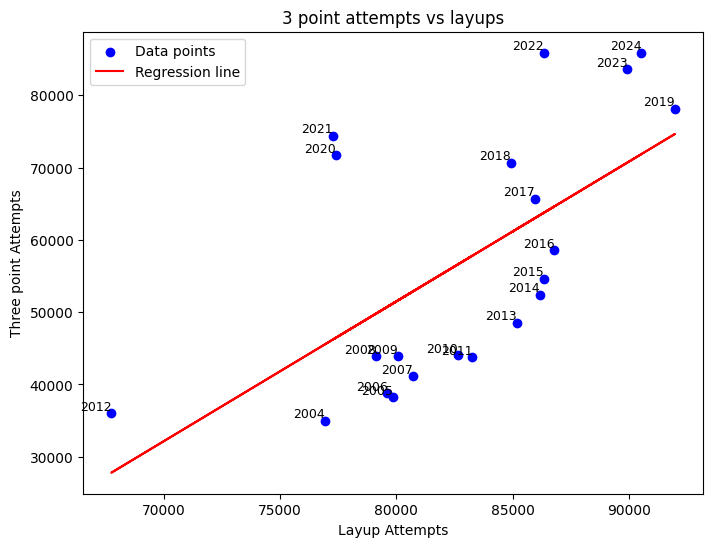

Coefficients: [1.93355556]
Intercept: -103195.16535695648


In [119]:
#Test and plot Linearity
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df_all3ptattempts = pd.DataFrame.from_dict(year_dict_three, orient='index', columns=['Makes', 'Attempts'])
df_alllayupattempts = pd.DataFrame.from_dict(year_dict_layup, orient='index', columns=['Makes', 'Attempts'])
df_all3ptattempts.index.name = 'year'
df_alllayupattempts.index.name = 'year'
df_alllayupattempts.reset_index(inplace=True)
df_all3ptattempts.reset_index(inplace=True)

merged_df = pd.merge(df_all3ptattempts, df_alllayupattempts, on="year", suffixes=("_Threes", "_Layups"))

X = merged_df[['Attempts_Layups']]
y = merged_df['Attempts_Threes']

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Scatter plot of actual data
plt.plot(X, y_pred, color='red', label='Regression line')  # Regression line

for i in range(len(merged_df)):
    plt.text(
        X.iloc[i, 0],  # X-coordinate (Attempts_first)
        y.iloc[i],     # Y-coordinate (Attempts_second)
        str(merged_df["year"].iloc[i]),  # Annotation (Year)
        fontsize=9, color='black', ha='right', va='bottom'  # Text style
    )
plt.xlabel("Layup Attempts")
plt.ylabel("Three point Attempts")
plt.title("3 point attempts vs layups")
plt.legend()
plt.show()


print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

c:\Users\kinga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


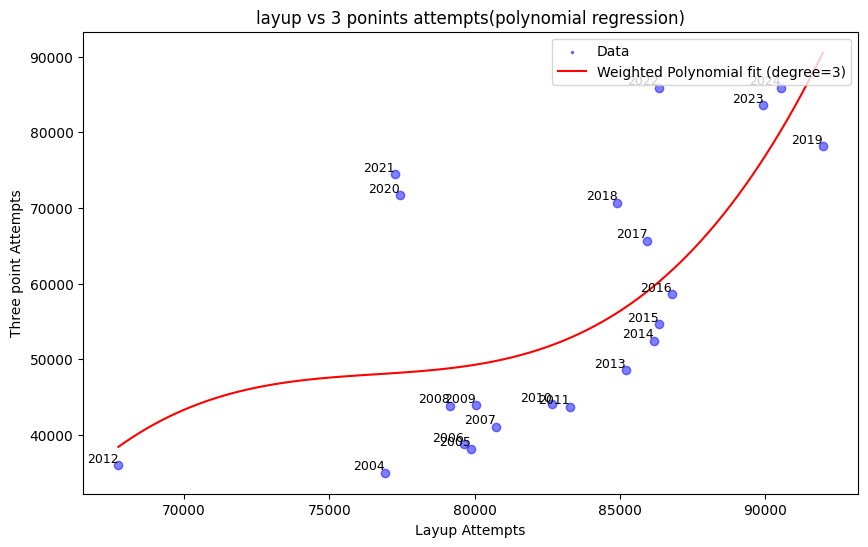

In [121]:
#Polnomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(X)

model2 = LinearRegression()
model2.fit(x_poly,y)

y_poly_pred = model2.predict(x_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
y_fit = model2.predict(X_fit_poly)
plt.plot(X_fit, y_fit, color='red', label='Weighted Polynomial fit (degree=3)')
for i in range(len(merged_df)):
    plt.text(
        X.iloc[i, 0],  # X-coordinate (Attempts_first)
        y.iloc[i],     # Y-coordinate (Attempts_second)
        str(merged_df["year"].iloc[i]),  # Annotation (Year)
        fontsize=9, color='black', ha='right', va='bottom'  # Text style
    )
plt.xlabel('Layup Attempts')
plt.ylabel('Three point Attempts')
plt.title('layup vs 3 ponints attempts(polynomial regression)')
plt.legend(loc='upper right', scatterpoints=1, markerscale=0.25, fontsize='medium', frameon=True)
plt.show()
